## **Detecting Parkinson Disease**

![](img/hands.jpg)
<span>Photo by <a href="https://unsplash.com/@claudz?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Claudia van Zyl</a> on <a href="https://unsplash.com/s/photos/hands?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span> *adapted*

### **OVERVIEW**

**Parkinson** is a neurological, chronic and progressive disease, with no known cause, which affects the central nervous system and impairs movement. The main cause of Parkinson's disease is the death of brain cells, especially in the area known as the substantia nigra, responsible for the production of dopamine, a neurotransmitter that, among other functions, controls movement.  The incidence of Parkinson's disease is in the elderly, with the possibility of appearing from 55, 60 years old and it's prevalence increases from 70, 75 years old.

The symptoms vary from person to person, but it starts slowly and unnoticed, being noticed by friends and family when they notice slow movements and tremors in the extremities of the hands.

Other symptoms may be associated: muscle stiffness; reduced amount of movement, speech disorders, difficulty swallowing, depression, pain, dizziness and sleep, respiratory, urinary disorders.

### **ABOUT THE DATA**

This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data 
is to discriminate healthy people from those with PD, according to "status" 
column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an 
instance corresponding to one voice recording. There are around six 
recordings per patient, the name of the patient is identified in the first 
column.For further information or to pass on comments, please contact Max 
Little (littlem '@' robots.ox.ac.uk).

Further details are contained in the following reference -- if you use this 
dataset, please cite:
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 
'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', 
IEEE Transactions on Biomedical Engineering (to appear).

**Features Dictionary**

`name` - ASCII subject name and recording number<br>
`MDVP:Fo(Hz)` - Average vocal fundamental frequency<br>
`MDVP:Fhi(Hz)` - Maximum vocal fundamental frequency<br>
`MDVP:Flo(Hz)` - Minimum vocal fundamental frequency<br>
`MDVP:Jitter(%)`, `MDVP:Jitter(Abs)`, `MDVP:RAP`, `MDVP:PPQ`, `Jitter:DDP` - Several 
measures of variation in fundamental frequency<br>
`MDVP:Shimmer`,`MDVP:Shimmer(dB)`,`Shimmer:APQ3`, `Shimmer:APQ5`, `MDVP:APQ`, `Shimmer:DDA` - Several measures of variation in amplitude<br>
`NHR`,`HNR` - Two measures of ratio of noise to tonal components in the voice<br>
`status` - Health status of the subject (one) - Parkinson's, (zero) - healthy <<=== TARGET<br>
`RPDE`,`D2` - Two nonlinear dynamical complexity measures<br>
`DFA` - Signal fractal scaling exponent<br>
`spread1`, `spread2`, `PPE` - Three nonlinear measures of fundamental frequency variation <br>

**Support Reading**

* ['Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection'](https://biomedical-engineering-online.biomedcentral.com/articles/10.1186/1475-925X-6-23);
* ['Doença de Parkinson'](https://drauziovarella.uol.com.br/doencas-e-sintomas/doenca-de-parkinson/); 
* ['Parkinson's Disease'](https://www.medtronic.com/br-pt/your-health/conditions/parkinsons-disease.html).

### **GOAL**

To predict if a patient has Parkinson or not.

### **PACKAGES & DATASET UPLOAD**

In [1]:
import pandas as pd
import numpy as np
import os, sys

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Data upload

PATH_FILE = 'C:/Mega/Portfolio/dataset/classification/dataset_parkinsons.data'
dataset = pd.read_csv(PATH_FILE)

### **EXPLORATORY DATA ANALYSIS**

Let's check some information about the dataset

In [3]:
# Check sample of data
dataset.sample(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
101,phon_R01_S24_5,128.451,150.449,75.632,0.01551,0.00012,0.00905,0.00909,0.02716,0.06170,...,0.09669,0.11843,15.060,1,0.639808,0.643327,-4.202730,0.310163,2.638279,0.356881
66,phon_R01_S18_1,140.341,159.774,67.021,0.00817,0.00006,0.00430,0.00440,0.01289,0.03198,...,0.05490,0.02183,19.560,1,0.460139,0.720908,-5.409423,0.226850,2.359973,0.226156
134,phon_R01_S33_1,106.516,112.777,93.105,0.00589,0.00006,0.00291,0.00319,0.00873,0.04932,...,0.08050,0.03031,17.060,1,0.637814,0.744064,-5.301321,0.320385,2.375138,0.243080
28,phon_R01_S06_5,155.358,227.383,80.055,0.00310,0.00002,0.00159,0.00176,0.00476,0.01718,...,0.02307,0.00677,25.970,1,0.470478,0.676258,-7.120925,0.279789,2.241742,0.108514
128,phon_R01_S32_1,119.031,127.533,109.216,0.00440,0.00004,0.00214,0.00192,0.00641,0.01033,...,0.01614,0.01724,26.842,1,0.457541,0.699787,-6.890021,0.152941,2.328513,0.112856


In [4]:
# Print dataset columns
dataset.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [5]:
# Check dataset shape [195 observations and 24 features]
dataset.shape

(195, 24)

In [7]:
## General information
# There is no missing values

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
# Double check for missing values

dataset.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
# Some statistics
dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### **MODELING**

> **x. Train test split**

In [9]:
# Explanatory features
features = dataset.drop(['status', 'name'], axis=1)

# Target features
target = dataset['status']

In [10]:
# Normalized features
features_normalized = (features - features.min()) / (features.max() - features.min())
features_normalized.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,...,0.172448,0.332584,0.068307,0.511745,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310
1,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,...,0.279424,0.516048,0.059331,0.432577,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326
2,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,...,0.219848,0.443317,0.039596,0.496220,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682
3,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,...,0.233785,0.475478,0.040997,0.495936,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949
4,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,...,0.286852,0.584542,0.054174,0.455499,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611


In [11]:
X_train, X_test, y_train, y_test = train_test_split(features_normalized, target, test_size=0.25, random_state=42)

### Modeling

Random Forest

In [12]:
# Modeling
rf_model = RandomForestClassifier(random_state=42)

# Fit
rf_model.fit(X_train, y_train)

# Prediction
rf_pred = rf_model.predict(X_test)

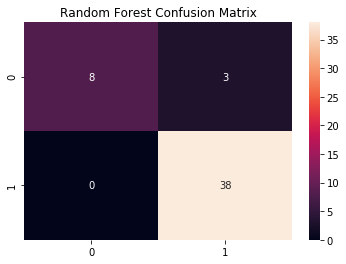

Random Forest Accuracy: 0.94


In [13]:
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
sns.heatmap(rf_conf_matrix,annot=True,fmt="d")
plt.title('Random Forest Confusion Matrix');
plt.show()

print('Random Forest Accuracy:', accuracy_score(y_test, rf_pred).round(2))

XGBoost

In [14]:
xgb_model = XGBClassifier(rando_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

[11:48:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { rando_state } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




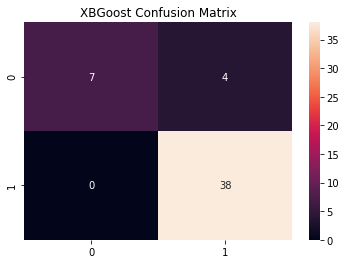

accuracy: 0.92


In [15]:
xgb_conf_matrix = confusion_matrix(y_test, xgb_pred)
sns.heatmap(xgb_conf_matrix,annot=True,fmt="d")
plt.title('XBGoost Confusion Matrix')
plt.show()
print('accuracy:', accuracy_score(y_test, xgb_pred).round(2))

Comparing accuracy of both models, Random Forest performed better then XGBoost.

## Let's see if PERSON A to Z diagnostic indicates 1 (Parkinson) or 0 (Health)

Using Random Forest model

In [38]:
Person_A = np.random.random(22)
Person_B = np.random.random(22)
Person_C = np.random.random(22)
Person_D = np.random.random(22)
Person_E = np.random.random(22)
Person_F = np.random.random(22)
Person_G = np.random.random(22)
Person_H = np.random.random(22)
Person_I = np.random.random(22)
Person_J = np.random.random(22)
Person_K = np.random.random(22)
Person_L = np.random.random(22)
Person_M = np.random.random(22)
Person_N = np.random.random(22)
Person_O = np.random.random(22)
Person_P = np.random.random(22)
Person_Q = np.random.random(22)
Person_R = np.random.random(22)
Person_S = np.random.random(22)
Person_T = np.random.random(22)
Person_U = np.random.random(22)
Person_V = np.random.random(22)
Person_X = np.random.random(22)
Person_Z = np.random.random(22)

In [39]:
df = pd.DataFrame([Person_A, Person_B, Person_C, Person_D, Person_E,Person_F,Person_G,Person_H,Person_I,Person_J,Person_K,Person_L,
          Person_M,Person_N,Person_O,Person_P,Person_Q,Person_R,Person_S,Person_T,Person_U,Person_V,Person_X,Person_Z])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.466553,0.203193,0.235636,0.172802,0.656096,0.126699,0.064317,0.079197,0.224136,0.116450,...,0.127184,0.212395,0.392965,0.023711,0.903755,0.122921,0.534360,0.266152,0.944363,0.062669
1,0.361474,0.700623,0.739015,0.625943,0.216811,0.810412,0.507525,0.445126,0.186422,0.045038,...,0.510918,0.498765,0.653807,0.847803,0.647637,0.023821,0.395732,0.347923,0.541059,0.133688
2,0.273574,0.851481,0.172568,0.316900,0.581467,0.695465,0.868234,0.585498,0.599708,0.754699,...,0.808683,0.568611,0.270959,0.536939,0.372659,0.670669,0.740713,0.326434,0.745305,0.170989
3,0.644504,0.211161,0.282122,0.600347,0.426841,0.754839,0.310880,0.516584,0.255686,0.573415,...,0.421104,0.778874,0.719857,0.201195,0.113797,0.385752,0.855224,0.437617,0.754843,0.212261
4,0.810388,0.691693,0.045096,0.871731,0.038040,0.121916,0.655726,0.503374,0.695103,0.335198,...,0.083721,0.894152,0.964242,0.927455,0.435057,0.449679,0.798923,0.815823,0.313905,0.936836


In [40]:
rf_model.predict(df)

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

WoW! Does these random values returns plenty of Parkinson cases?? These people need observation!